In [1]:
import tensorflow as tf

In [11]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [17]:
"""
    Dataset shapes
"""
print("X-train shape:",X_train.shape)
print("Y-train shape:",Y_train.shape)
print("X-test shape:",X_test.shape)
print("Y-test shape:",Y_test.shape)

X-train shape: (60000, 28, 28)
Y-train shape: (60000,)
X-test shape: (10000, 28, 28)
Y-test shape: (10000,)


AxesImage(72,43.2;372x372)
1


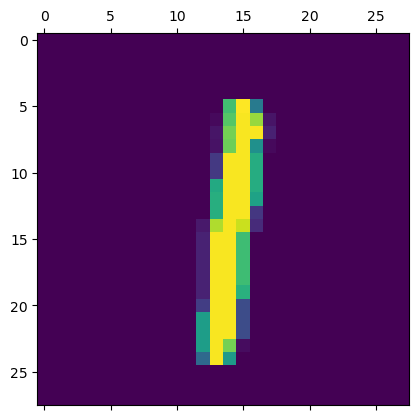

In [16]:
"""
    Print an example
"""
print(plt.matshow(X_train[40]))
print(Y_train[40])

In [50]:
"""
    Normalise the data
"""
X_train = X_train/255
X_test = X_test/255

In [57]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dense(100,activation="relu",name="layer1",kernel_regularizer='l2'),
        keras.layers.Dense(100,activation="relu",name="layer2",kernel_regularizer='l2'),
        keras.layers.Dense(10,input_shape=(100,),activation="sigmoid",name="layer3")
    ]
)
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

model.fit(X_train,Y_train,epochs=10)
model.evaluate(X_test,Y_test)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7862 - accuracy: 0.8956
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4829 - accuracy: 0.9268
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4223 - accuracy: 0.9348
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3821 - accuracy: 0.9423
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3587 - accuracy: 0.9452
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3424 - accuracy: 0.9471
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3306 - accuracy: 0.9485
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3203 - accuracy: 0.9507
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3115 - accuracy: 0.9513
Epoch 10/10
313/313 [==============================] - 2s 4ms/step - loss

[0.2863772213459015, 0.9569000005722046]

In [ ]:
Y_predictions = model.predict(X_test)

In [41]:
Y_predictions_labels = [np.argmax(i) for i in Y_predictions]

In [42]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_predictions_labels)

In [43]:
cm_flattened

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    1,    2,    1,    0,    0,    0,    1,    1,    0],
       [   1, 1130,    2,    1,    0,    1,    0,    0,    0,    0],
       [ 139,  394,  498,    0,    0,    0,    0,    1,    0,    0],
       [   2,    4,   52,  949,    0,    1,    0,    0,    1,    1],
       [   9,   64,   13,    2,  892,    0,    0,    1,    0,    1],
       [   8,    3,    2,  251,    1,  627,    0,    0,    0,    0],
       [ 329,   22,   13,    2,   35,  311,  246,    0,    0,    0],
       [   3,  122,  480,   76,    6,    4,    0,  336,    0,    1],
       [  45,   14,   10,   86,    2,   32,    5,    4,  771,    5],
       [  13,    6,    1,  160,  132,   28,    1,  223,    0,  445]])>

Text(95.72222222222221, 0.5, 'Truth')

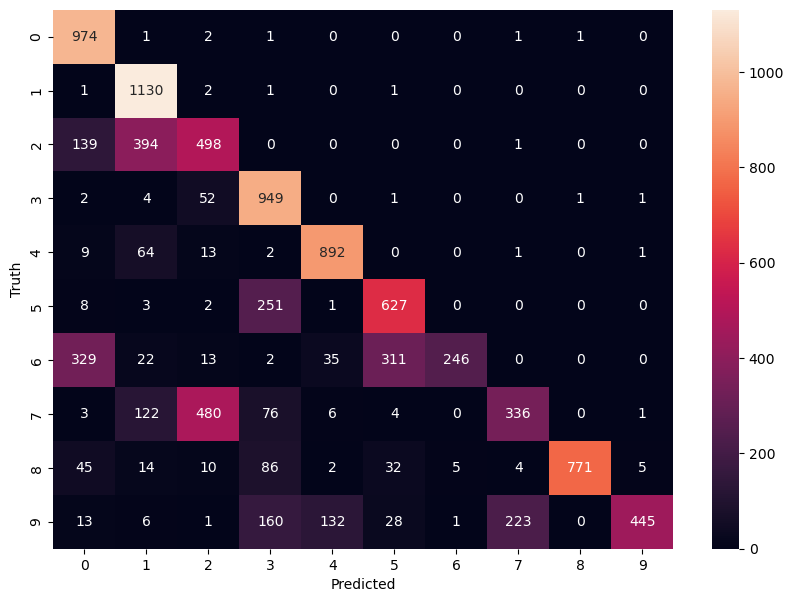

In [44]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_flattened,annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(95.72222222222221, 0.5, 'Truth')

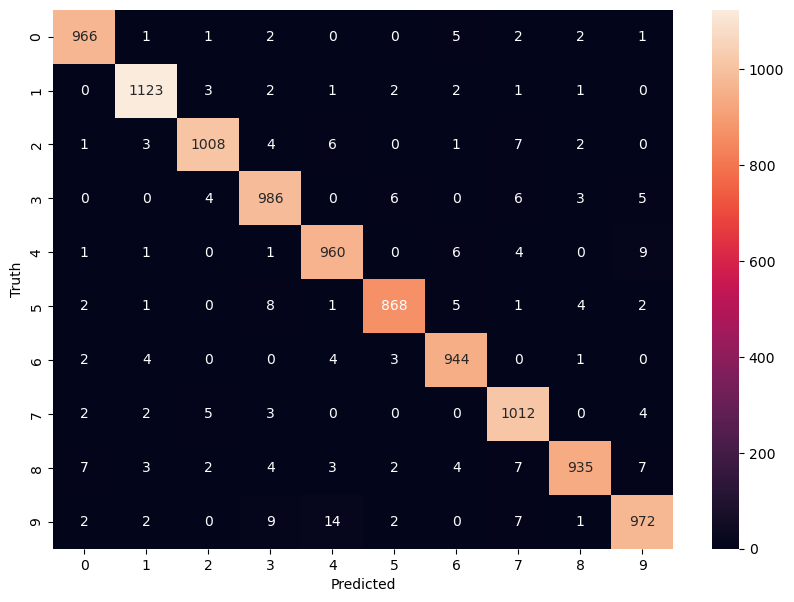

In [46]:
plt.figure(figsize = (10,7))
sn.heatmap(cm_normalised,annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')